# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
from scipy.optimize import minimize

In [5]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(name=tickers, data_source='yahoo', start='2015-01-01', end='2019-12-31')
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

In [6]:
company = ['^GSPC','AAPL','AMZN','JPM', 'T', 'HD', 'DIS', 'KO', 'CVX', 'PFE', 'PEP', 'CSCO', 'MCD', 'PM', 'IBM', 'NKE']

In [16]:
closes = get_adj_closes(tickers=company,start_date= '2015-01-01')
closes.sample(20)

Symbols,^GSPC,AAPL,AMZN,JPM,T,HD,DIS,KO,CVX,PFE,PEP,CSCO,MCD,PM,IBM,NKE
Date,,,,,,,,,,,,,,,,
2015-09-23,1938.760010,106.121704,536.070007,53.549435,25.218794,105.380829,95.215164,33.768055,63.329220,27.645376,81.504410,21.923605,87.021332,64.141182,118.112381,54.654461
2018-12-06,2695.949951,171.726135,1699.189941,101.354523,28.343594,171.294556,112.080246,47.863388,110.097733,42.931202,113.473305,46.716980,181.079788,79.290504,117.017029,74.748367
2019-05-16,2876.320068,188.346725,1907.569946,108.949692,30.319489,188.673737,133.864014,48.476776,117.036232,40.446007,127.542244,54.758896,196.520432,81.741287,131.358276,83.611336
2015-11-17,2050.439941,105.988625,643.299988,58.818859,26.421787,114.461151,108.864212,36.303276,76.658745,28.082104,87.176193,23.437967,99.138893,67.717522,111.054321,58.039879
2016-06-30,2098.860107,90.153221,715.619995,56.052692,35.240749,117.589157,92.287613,40.412670,90.344849,30.655773,95.485474,25.508116,110.005913,85.760445,129.706360,52.816128
2019-04-12,2907.409912,196.300613,1843.060059,108.851814,30.875631,199.922760,128.489700,45.699974,114.898186,40.157833,119.670593,55.111355,188.275986,81.989830,137.908264,85.555786
2016-05-26,2090.100098,94.689178,714.909973,58.659592,31.676714,122.810127,94.165054,39.538872,87.474983,29.976660,91.160591,25.694828,112.333939,82.637169,130.270401,53.272869
2017-04-05,2352.949951,137.846390,909.280029,80.273903,35.052898,137.283813,108.211090,38.926174,96.476845,30.623341,103.061760,30.370701,121.963013,98.425308,151.554520,53.252899
2016-01-25,1877.079956,92.703934,596.530029,49.838490,28.195307,110.894997,89.900703,37.011856,68.119576,26.057318,85.219803,20.413628,107.355438,70.842735,101.311531,57.760521


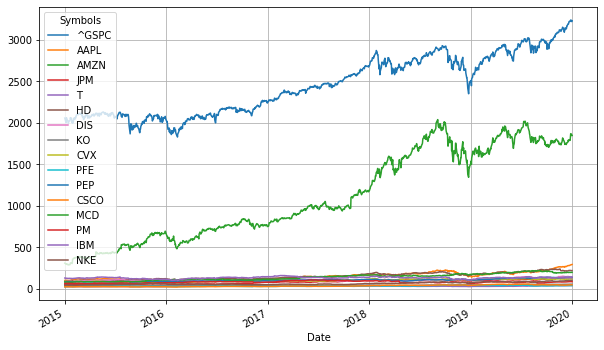

In [21]:
closes.plot(figsize=(10,6),grid=True)

Wow con AMAZON!!

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [17]:
rend=closes.pct_change().dropna()
rend

Symbols,^GSPC,AAPL,AMZN,JPM,T,HD,DIS,KO,CVX,PFE,PEP,CSCO,MCD,PM,IBM,NKE
Date,,,,,,,,,,,,,,,,
2015-01-05,-0.018278,-0.028172,-0.020517,-0.031045,-0.009448,-0.020980,-0.014613,0.000000,-0.039972,-0.005426,-0.007518,-0.019920,-0.011044,-0.007529,-0.015735,-0.016100
2015-01-06,-0.008893,0.000094,-0.022833,-0.025929,0.001490,-0.003061,-0.005304,0.007593,-0.000463,0.008344,-0.007575,-0.000370,0.001843,0.008581,-0.021566,-0.005882
2015-01-07,0.011630,0.014022,0.010600,0.001526,0.001207,0.034274,0.010230,0.012482,-0.000833,0.013686,0.029241,0.009242,0.017424,0.007522,-0.006536,0.020656
2015-01-08,0.017888,0.038423,0.006836,0.022346,0.009949,0.022124,0.010341,0.012096,0.022883,0.020408,0.018174,0.007692,0.003723,0.015053,0.021735,0.023084
2015-01-09,-0.008404,0.001072,-0.011749,-0.017387,-0.002985,-0.017148,0.004904,-0.011032,-0.019926,0.004615,-0.006771,0.010178,-0.012188,-0.002653,0.004356,-0.011024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.000195,0.000951,-0.002114,0.002770,-0.002815,0.006660,0.004216,-0.003642,0.000083,-0.000763,-0.001095,-0.006653,0.002396,0.001046,-0.004205,0.001000
2019-12-26,0.005128,0.019840,0.044467,0.010612,0.005133,0.000680,0.002822,0.005666,0.002161,0.002291,-0.001461,0.001465,0.001983,-0.000929,-0.000519,0.005692
2019-12-27,0.000034,-0.000380,0.000551,0.000719,0.002043,-0.003849,0.000343,0.005998,-0.002488,-0.001524,0.006218,-0.001672,0.005633,0.003255,0.002668,0.008539


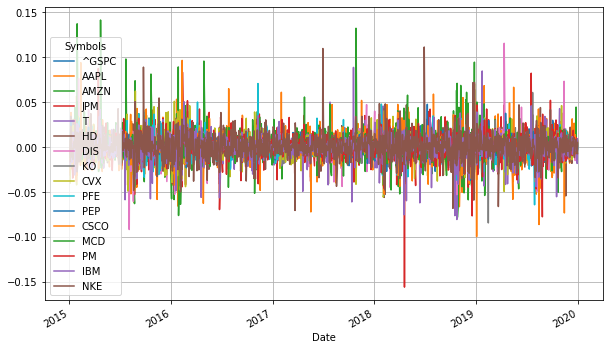

In [22]:
rend.plot(figsize=(10,6)grid=True)
#grid es para cuadrícula

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [27]:
rmd=pd.DataFrame(data={'Rendimiento Medio Diario':rend.mean()},index=rend.columns)
rmd


,Rendimiento Medio Diario
Symbols,
^GSPC,0.000395
AAPL,0.000976
AMZN,0.001593
JPM,0.000830
T,0.000396
HD,0.000755
DIS,0.000479
KO,0.000387
CVX,0.000313


In [28]:
voldia= pd.DataFrame(data={'Volatilidad Diaria':rend.std()},index=rend.columns)
voldia

,Volatilidad Diaria
Symbols,
^GSPC,0.008466
AAPL,0.015646
AMZN,0.018426
JPM,0.013228
T,0.011358
HD,0.011862
DIS,0.012541
KO,0.008918
CVX,0.013891


In [34]:
#Ambos de forma anual
rsa= pd.DataFrame(data={'Rend. Medio Diario':252*rend.mean(),'Volatilidad':np.sqrt(252)*rend.std()},index=rend.columns)
rsa

,Rend. Medio Diario,Volatilidad
Symbols,,
^GSPC,0.099454,0.134390
AAPL,0.246032,0.248374
AMZN,0.401331,0.292501
JPM,0.209216,0.209985
T,0.099701,0.180310
HD,0.190273,0.188311
DIS,0.120806,0.199080
KO,0.097417,0.141575
CVX,0.078945,0.220512


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (20 puntos).

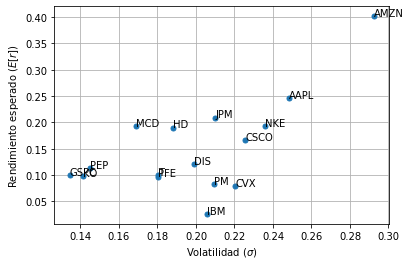

In [47]:
x_points=rsa.loc[:,'Volatilidad']
y_points=rsa.loc[:,'Rend. Medio Diario']

plt.figure(figsize=(6,4))
plt.plot(x_points, y_points, 'o', ms=5)
plt.grid()
# Etiquetas de los ejes
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
# Etiqueta de cada instrumento
plt.text(x_points[0], y_points[0], 'GSPC')
plt.text(x_points[1], y_points[1], 'AAPL')
plt.text(x_points[2], y_points[2], 'AMZN')
plt.text(x_points[3], y_points[3], 'JPM')
plt.text(x_points[4], y_points[4], 'T')
plt.text(x_points[5], y_points[5], 'HD')
plt.text(x_points[6], y_points[6], 'DIS')
plt.text(x_points[7], y_points[7], 'KO')
plt.text(x_points[8], y_points[8], 'CVX')
plt.text(x_points[9], y_points[9], 'PFE')
plt.text(x_points[10], y_points[10], 'PEP')
plt.text(x_points[11], y_points[11], 'CSCO')
plt.text(x_points[12], y_points[12], 'MCD')
plt.text(x_points[13], y_points[13], 'PM')
plt.text(x_points[14], y_points[14], 'IBM')
plt.text(x_points[15], y_points[15], 'NKE')                            
plt.show()

In [42]:
def objetivo(beta, voldia, rmd):
    recta=beta[0]+beta[1]*voldia
    return ((rmd-recta)**2).sum()

In [44]:
# Resolver problema de optimizacion
beta_ini=[0,0]
solucion=minimize(fun=objetivo, 
                  x0=beta_ini, 
                  args=(rsa['Volatilidad'],
                       rsa['Rend. Medio Diario']))
solucion

      fun: 0.06860694099996839
 hess_inv: array([[ 0.79004095, -3.81160127],
       [-3.81160127, 19.14664929]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-0.12601883,  1.391467  ])

In [46]:
beta_opt= solucion.x
beta_opt

array([-0.12601883,  1.391467  ])

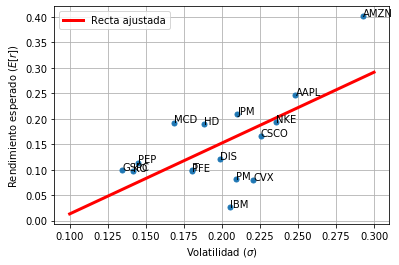

In [49]:
x_points=rsa.loc[:,'Volatilidad']
y_points=rsa.loc[:,'Rend. Medio Diario']

plt.figure(figsize=(6,4))
#Grafica de recta ajustada
x_recta=np.linspace(0.1,0.3,100)
y_recta=beta_opt[1]*x_recta+beta_opt[0]
plt.plot(x_recta, y_recta,'r',lw=3,label='Recta ajustada')

# Graficar puntos
plt.plot(x_points, y_points, 'o', ms=5)
plt.grid()
# Etiquetas de los ejes
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
# Etiqueta de cada instrumento
plt.text(x_points[0], y_points[0], 'GSPC')
plt.text(x_points[1], y_points[1], 'AAPL')
plt.text(x_points[2], y_points[2], 'AMZN')
plt.text(x_points[3], y_points[3], 'JPM')
plt.text(x_points[4], y_points[4], 'T')
plt.text(x_points[5], y_points[5], 'HD')
plt.text(x_points[6], y_points[6], 'DIS')
plt.text(x_points[7], y_points[7], 'KO')
plt.text(x_points[8], y_points[8], 'CVX')
plt.text(x_points[9], y_points[9], 'PFE')
plt.text(x_points[10], y_points[10], 'PEP')
plt.text(x_points[11], y_points[11], 'CSCO')
plt.text(x_points[12], y_points[12], 'MCD')
plt.text(x_points[13], y_points[13], 'PM')
plt.text(x_points[14], y_points[14], 'IBM')
plt.text(x_points[15], y_points[15], 'NKE')   
plt.legend(loc='best')
plt.show()

Como podemos ver, para tener un mayor rendimiento necesitamos aceptar que habrá mayor volatilidad, mayormente los activos que tienen volatilidad más alta también tienen mayores rendimientos, lo que hace que la recta ajustada sea muy certera y por tal motivo su pendiente sea positiva.
La volatilidad representa riesgo, por lo tanto mientras más nos arrieguemos, mas rendimientos obtendremos.


Para obtener las betas tuvimos que optimizar la función de tal forma que nos dio la recta ajustada que representa la relacion  rendimiento-riesgo, en este caso es la ecuación de $$-0.12x+1.39=0$$

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>